# Instalacja Roulette-v0
`pip install https://github.com/Rohan138/gym-legacy-toytext/archive/refs/heads/main.zip`

In [1]:
import gym
import gym_toytext
import plotting

from learning_functions import double_Q_Learning, sarsa, qLearning, avg_res

In [2]:
env = gym.make("Roulette-v0")

/home/ania/PycharmProjects/reinforcement/venv/lib/python3.8/site-packages/gym/utils/seeding.py:63: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(
/home/ania/PycharmProjects/reinforcement/venv/lib/python3.8/site-packages/gym/envs/registration.py:619: UserWarning: WARN: Env check failed with the following message: The environment cannot be reset with a random seed, even though `seed` or `kwargs` appear in the signature. This should never happen, please report this issue. The error was: reset() got an unexpected keyword argument 'seed'
You can set `disable_env_checker=True` to disable this check.
  logger.warn(


In [3]:
state = env.reset()

In [4]:
print('State space: ', env.observation_space)
print('Action space: ', env.action_space)
print('Reward range: ', env.reward_range)

State space:  Discrete(1)
Action space:  Discrete(38)
Reward range:  (-inf, inf)


In [5]:
num_episodes = 600
args = {"env":env, "num_episodes": num_episodes, "discount_factor": 1,}
params = {"qleaning": {"fun": qLearning, "args": args, "res": []},
          "sarsa": {"fun": sarsa, "args": args, "res": []},
          "double": {"fun": double_Q_Learning, "args": args, "res": []}}

In [6]:
for _ in range(20):
    for key, val in params.items():
        val["res"].append(val["fun"](**val["args"]))

In [7]:
res_avg = {name: avg_res(params[name]["res"]) for name in ("double", "qleaning", "sarsa")}

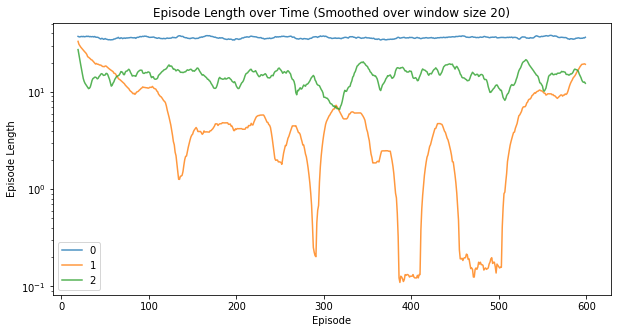

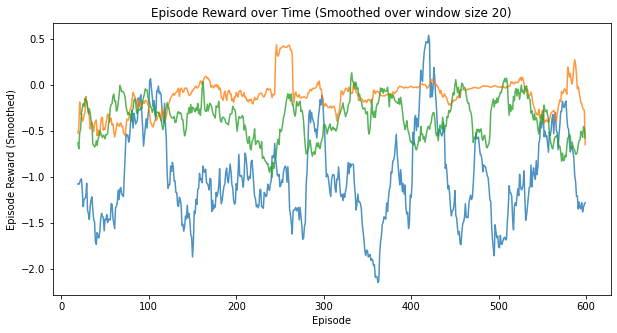

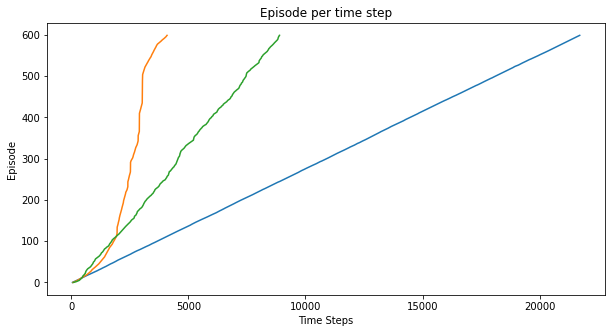

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [8]:
plotting.plot_episode_stats_multiple(res_avg["double"][1], res_avg["qleaning"][1], res_avg["sarsa"][1], smoothing_window=20)

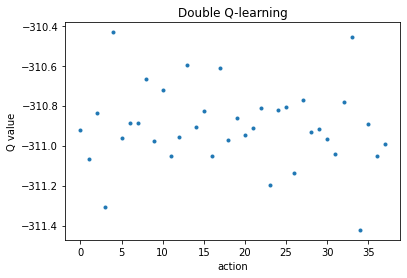

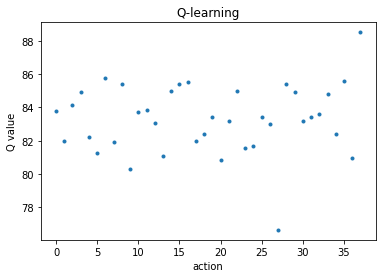

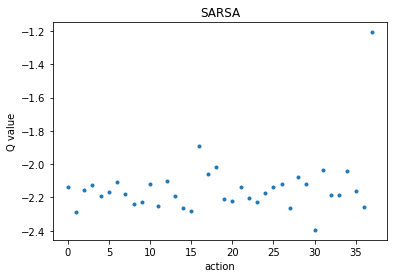

In [9]:
from matplotlib import pyplot as plt

plt.plot(next(iter(res_avg["double"][0].values())),'.')
plt.title("Double Q-learning")
plt.xlabel("action")
plt.ylabel("Q value")
plt.show()
plt.plot(next(iter(res_avg["qleaning"][0].values())),'.')
plt.title("Q-learning")
plt.xlabel("action")
plt.ylabel("Q value")
plt.show()
plt.plot(next(iter(res_avg["sarsa"][0].values())),'.')
plt.title("SARSA")
plt.xlabel("action")
plt.ylabel("Q value")
plt.show()

# Komentarz
    """Simple roulette environment

    The roulette wheel has s spots. If the bet is 0 and a 0 comes up, you win a reward of s-2.
    If any other number comes up you get a reward of -1.

    For non-zero bets, if the parity of your bet matches the parity of the spin, you win 1.
    Otherwise you receive a reward of -1.

    The last action (s+1) stops the rollout for a return of 0 (walking away)"""

Gra ma 1 stan.

### Q-learning
W tej grze najszybciej uczy się algorytm Q-learning, który już ok. 100 epizodu kończy gry z "wygraną" równą lub bliską 0, w przeciwieństwie do dwóch innych algorytmów, dla których wygrana jest ujemna. Algorytm ten szybko uczy się, że najpewniejszą akcją o największej wartości oczekiwanej jest rezygnacja z dalszej gry (ostatnia akcja).

### SARSA
Algorytm SARSA radzi sobie trochę gorzej, gdyż tutaj kolejna akcja jest losowana.

### Double Q-learning
Algorytm double Q-learning uaktualnia jedną tablicę Q używając wartości akcji z drugiej tablicy Q. Ponieważ akcje mają (prawie) te same wartości oczekiwane, a dwie z nich się tylko odchyleniem standardowym, losowa wartość nagrody jest dodawana do losowej wartości Q akcji z drugiej tablicy. Tablice Q uaktualniane są losowymi wartościami, co widać też na wykresie.

### Który z algorytmów jest najlepszy?
Żaden nie jest najlepszy dla wszystkich gier. Można za to wskazać algorytm, który dobrze sprawdza się dla danej gry. ("No free lunch theorem")